In [ ]:
#@title Using Google cobal free LLM models
!pip install -q feedparser # for reading RSS feed

import pandas as pd
import urllib.parse, feedparser
from datetime import datetime, timedelta

# Get the default start/end date as current week
DATE_FORMAT = '%Y-%m-%d'
today_date = (datetime.now() + timedelta(days=1)).strftime(DATE_FORMAT)
seven_days_ago = (datetime.now() - timedelta(days=7)).strftime(DATE_FORMAT)

# Enable Google interactive table
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Display LLM output text
from IPython.display import HTML, display

def displayLLMOutput(llmOutput):
  htmlText = llmOutput.replace('\n', '<br>')
  display(HTML(f"<h2>{htmlText}</h2>"))

from google.colab import ai
print("The free LLM models from Google Colab:")
ai.list_models()

In [ ]:
#@title Ask the LLM questions

question = "What is the sentiment of 'Apple is doing great'?" # @param["What is the sentiment of 'Apple is doing great'?", "What is the sentiment of 'Apple is doing great'? Output a numeric score between -1 to 1 where -1 is very positive and 1 is very negative", "What is the sentiment of 'Apple is doing great' with respect to Facebook? Output POSITIVE, NEUTRAL or NEGATIVE", "'Social Media advertising is generating a lot of profits'. What is the sentiment for Facebook and please explain it"] {allow-input: true}
displayLLMOutput(ai.generate_text(question))


## Use **RSS feed** to get the news. Then use LLM to summarize it and provide investment advice

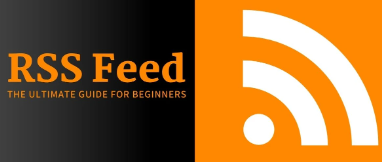

In [ ]:
#@title Select or type a <b>news_query</b>. <br> <b>startDate</b> and <b>endDate</b> if not selected, it defaults to the current week
news_query = 'Tariff' # @param ["Tariff", "Bitcoin", "Donald Trump", "US Interest Rate", "Hong Kong"] {allow-input: true}
startDate = seven_days_ago #@param {type:"date"}
endDate = today_date #@param {type:"date"}

# Specify the RSS feed URL
feed_url = f"https://news.google.com/rss/search?q={urllib.parse.quote(news_query)}+after:{startDate}+before:{endDate}"
print(feed_url)

# Parse the RSS feed
feed = feedparser.parse(feed_url)

# Extract headlines and other relevant information
entries = feed.entries
all_headlines = ''

data = []
for entry in entries:
    title = entry.title
    all_headlines += title + " "
    pub_date = entry.published  # Or entry.updated
    data.append({'Publication Date': pub_date, 'Title': title})

# Create a pandas DataFrame
df = pd.DataFrame(data)
df

In [ ]:
#@title Summarize the above news headlines

question = "Summarize the news" # @param {type:"string"}
questionWithContext = question + "  Use the following context: \n\n" + all_headlines

result = ai.generate_text(questionWithContext)
displayLLMOutput(result)

In [ ]:
#@title Ask questions based on the news summary

question = "What is the overall sentiment? Provide a sentiment score between -1 to 1 and elaborate your reasons" # @param ["What is the overall sentiment? Provide a sentiment score between -1 to 1 and elaborate your reasons", "You are an investment analyst, write some long term investment advice", "You are a momentum trader, provide some short term trading ideas"] {allow-input: true}
questionWithContext = question + "  Use the following context: \n\n" + result

result = ai.generate_text(questionWithContext)
displayLLMOutput(result)
